<a href="https://colab.research.google.com/github/FrancoGalfrascoli/CSE---437-/blob/main/lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

Thef follwing code runs the cliff problem using a random policy.

In [1]:
import gymnasium as gym

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -793
Episode 2: total reward = -793
Episode 3: total reward = -892
Episode 4: total reward = -595
Episode 5: total reward = -1288


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Wreite a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [2]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q[next_state])

            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action


    print(f"Episode {episode+1}: total reward = {total_reward}")


Episode 1: total reward = -100
Episode 2: total reward = -333
Episode 3: total reward = -298
Episode 4: total reward = -496
Episode 5: total reward = -199
Episode 6: total reward = -100
Episode 7: total reward = -298
Episode 8: total reward = -199
Episode 9: total reward = -496
Episode 10: total reward = -298
Episode 11: total reward = -199
Episode 12: total reward = -100
Episode 13: total reward = -100
Episode 14: total reward = -199
Episode 15: total reward = -87
Episode 16: total reward = -67
Episode 17: total reward = -100
Episode 18: total reward = -199
Episode 19: total reward = -100
Episode 20: total reward = -100
Episode 21: total reward = -298
Episode 22: total reward = -100
Episode 23: total reward = -100
Episode 24: total reward = -77
Episode 25: total reward = -199
Episode 26: total reward = -48
Episode 27: total reward = -76
Episode 28: total reward = -199
Episode 29: total reward = -199
Episode 30: total reward = -65
Episode 31: total reward = -199
Episode 32: total rewar

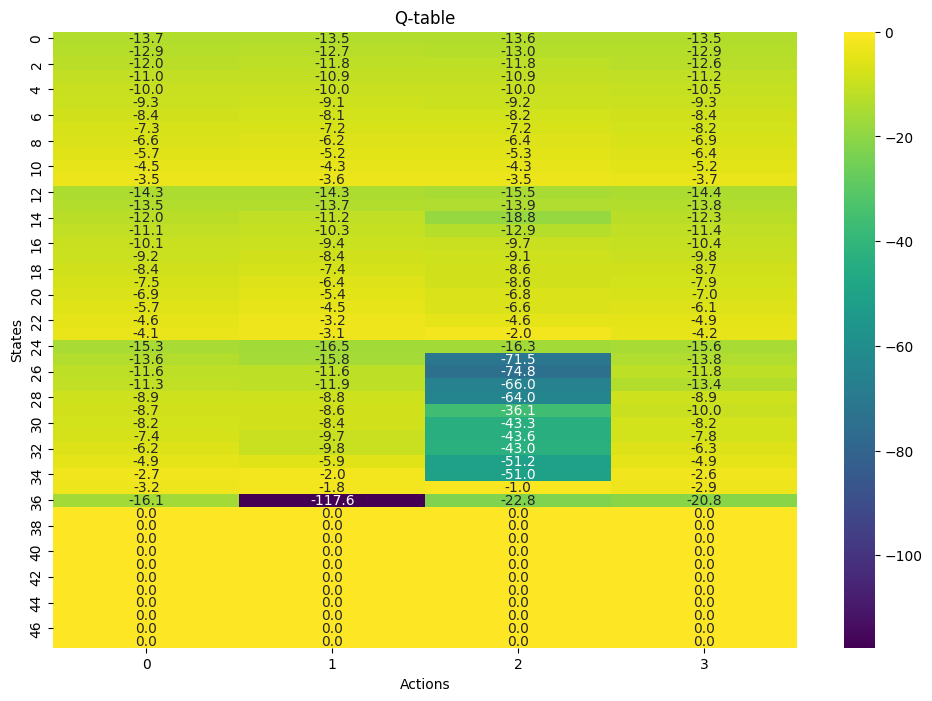

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

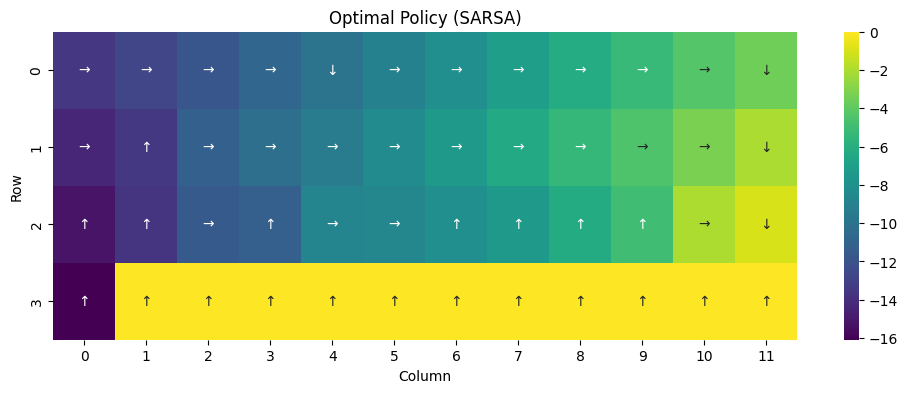

In [4]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [5]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = np.argmax(Q[next_state])
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    print(f"Episode {episode+1}: total reward = {total_reward}")


Episode 1: total reward = -298
Episode 2: total reward = -298
Episode 3: total reward = -279
Episode 4: total reward = -298
Episode 5: total reward = -298
Episode 6: total reward = -298
Episode 7: total reward = -199
Episode 8: total reward = -298
Episode 9: total reward = -199
Episode 10: total reward = -298
Episode 11: total reward = -100
Episode 12: total reward = -298
Episode 13: total reward = -190
Episode 14: total reward = -199
Episode 15: total reward = -298
Episode 16: total reward = -100
Episode 17: total reward = -298
Episode 18: total reward = -165
Episode 19: total reward = -100
Episode 20: total reward = -397
Episode 21: total reward = -41
Episode 22: total reward = -199
Episode 23: total reward = -298
Episode 24: total reward = -70
Episode 25: total reward = -100
Episode 26: total reward = -73
Episode 27: total reward = -199
Episode 28: total reward = -100
Episode 29: total reward = -199
Episode 30: total reward = -37
Episode 31: total reward = -197
Episode 32: total rew

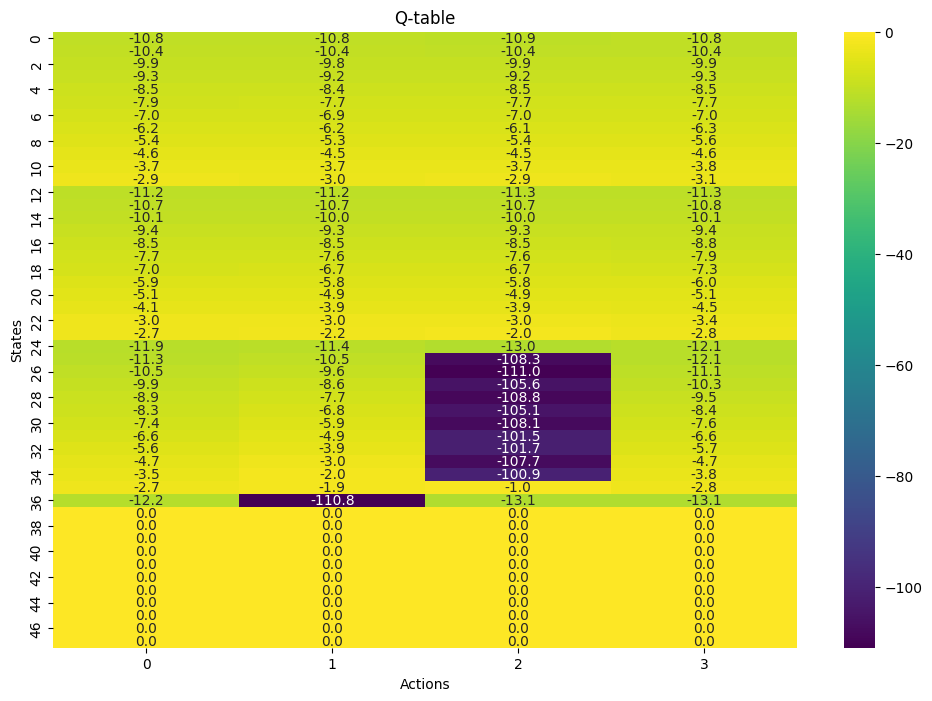

In [6]:
plot_Q(Q)

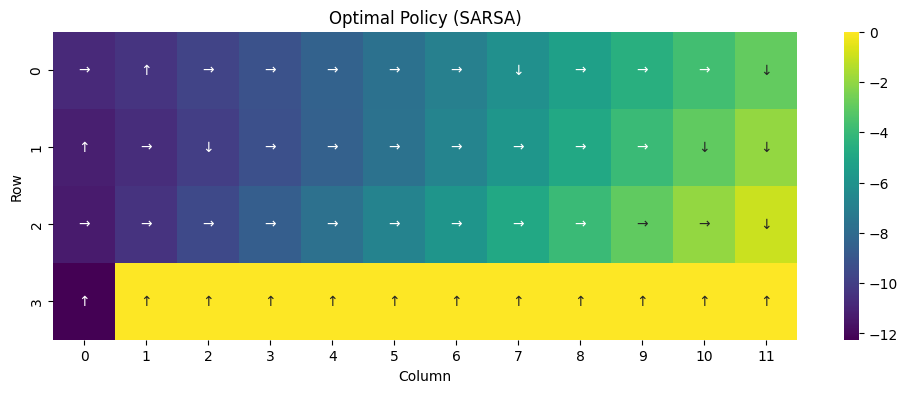

In [7]:
plot_policy(Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


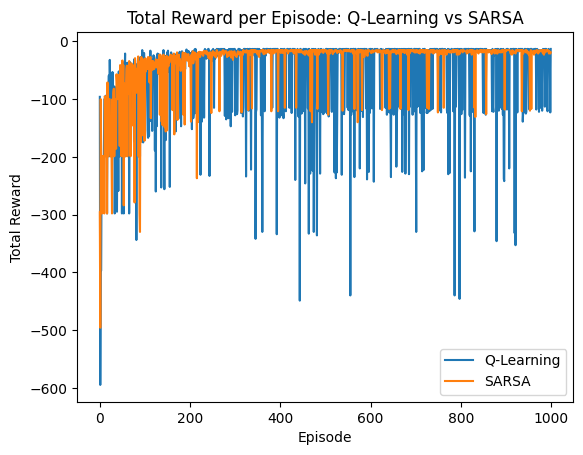

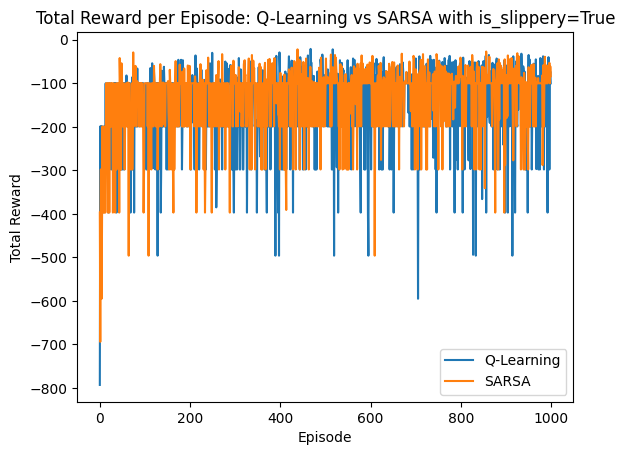

In [8]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

reward_episodes_SARSA = []
reward_episodes_SARSA_average = np.zeros(n_episodes)
# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q[next_state])

            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action

    reward_episodes_SARSA.append(total_reward)
    reward_episodes_SARSA_average[episode] += (total_reward - reward_episodes_SARSA_average[episode])/(episode + 1)


# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

reward_episodes_Q = []
reward_episodes_Q_average = np.zeros(n_episodes)

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = np.argmax(Q[next_state])
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    reward_episodes_Q.append(total_reward)
    reward_episodes_Q_average[episode] += (total_reward - reward_episodes_Q_average[episode])/(episode + 1)

plt.plot(reward_episodes_Q, label="Q-Learning")
# plt.plot(reward_episodes_Q_average, label="Q-Learning Average", linestyle='--')

plt.plot(reward_episodes_SARSA, label="SARSA")
# plt.plot(reward_episodes_SARSA_average, label="SARSA Average", linestyle='--')

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode: Q-Learning vs SARSA")
plt.legend()

# Create the environment
env = gym.make("CliffWalking-v1", is_slippery=True, render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1
reward_episodes_SARSA_slippery = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q[next_state])

            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action

    reward_episodes_SARSA_slippery.append(total_reward)



# Create the environment
env = gym.make("CliffWalking-v1", is_slippery=True, render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.1

reward_episodes_Q_slippery = []
# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset()
    terminated = False
    truncated = False
    total_reward = 0

    for step in range(max_steps):

        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])

            break
        else:
            next_action = np.argmax(Q[next_state])
            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state

    reward_episodes_Q_slippery.append(total_reward)


plt.figure()
plt.plot(reward_episodes_Q_slippery, label="Q-Learning")
plt.plot(reward_episodes_SARSA_slippery, label="SARSA")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode: Q-Learning vs SARSA with is_slippery=True")
plt.legend()


1. From the first plot, I can see that Q-Learning shows more variability, obtaining rewards smaller than '-200' much more often than the SARSA algorithm. However, both algorithms converge to a similar final value.

2. After setting is_slippery=True, both algorithms seem to perform similarly. Based on the plot, it is difficult to determine if one consistently outperforms the other.

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?


In [1]:
import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='ansi')
obs, info = env.reset(options=options)
done = env.unwrapped.done

n_episodes = 100    # number of episodes to run
max_steps = 100     # safety cap
epsilon = 0.9
reward_episodes_SARSA = []

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))


for episode in range(n_episodes):
    state, info = env.reset(options=options)
    terminated = False
    truncated = False
    total_reward = 0

    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])



    for step in range(max_steps):

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward

        if terminated or truncated:
            Q[state][action] += learning_rate * (reward - Q[state][action])
            break
        else:
            if np.random.rand() < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(Q[next_state])

            Q[state][action] += learning_rate * (reward + discount_factor * Q[next_state][next_action] - Q[state][action])
            state = next_state
            action = next_action

    reward_episodes_SARSA.append(total_reward)
    print(f"Episode {episode+1}: total reward = {total_reward}")



ModuleNotFoundError: No module named 'gym_simplegrid'

In [ ]:
def plot_Q(Q):
  plt.figure(figsize=(10, 15))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((8, 8, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: down, 2: left, 3: right)
  action_arrows = {0: "↑", 1: "↓", 2: "←", 3: "→"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()


plot_policy(Q, "SARSA")